## Problem Statement

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market.Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored.
                                                                 
The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. Predict the total sales generated from all the sales channel.  


### Features

Advertisement through TV

Advertisement through Radio

Advertisement through newspaper

## Importing Important Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [3]:
adv_df = pd.read_csv("Advertising.csv",index_col=0)
adv_df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [4]:
print(adv_df.shape)
print(adv_df.columns)
type(adv_df)

(200, 4)
Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


pandas.core.frame.DataFrame

There are 200 rows and 4 columns in the dataset.

In [5]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


Observation

Dataset has 200 rows and 4 columns. 

sales if the dependent(target) column.

There is no missing values in the dataset

All the columns are float type

## Exploratory Data Analysis

In [6]:
#check some statistics
adv_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Key Observations

1 The mean is more than median(50th percentile) in all the columns except ['TV'].

2 There is a large difference between 75% and max value in ['newspaper']

3 The 1 and 2 observations suggest that there are extreme outliers present in newspapers.\

4 wherever Mean value is higher than the median value, that data is skewed data.

5 Also we can see the minimum value for radio is 0 which is also a null nalue. So we will change that. 

In [7]:
adv_df['radio'].describe()

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: radio, dtype: float64

In [8]:
adv_df[adv_df.radio == 0]

,TV,radio,newspaper,sales
128,80.2,0.0,9.2,8.8


Only one row has null value for radio column. We will change this 0 value to null values and replace that null value with median value of amount of radio .

In [9]:
adv_df["radio"]  =adv_df["radio"].replace(0, np.nan)
adv_df["radio"]  =adv_df["radio"].fillna(adv_df["radio"].median())  # imputing the missing value with median

In [10]:
#Checking min value of radio again
adv_df['radio'].describe()

count    200.000000
mean      23.380500
std       14.754472
min        0.300000
25%       10.075000
50%       23.300000
75%       36.525000
max       49.600000
Name: radio, dtype: float64

In [11]:
# again checking the data description
adv_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.380500,30.554000,14.022500
std,85.854236,14.754472,21.778621,5.217457
min,0.700000,0.300000,0.300000,1.600000
25%,74.375000,10.075000,12.750000,10.375000
50%,149.750000,23.300000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Univariate Analysis

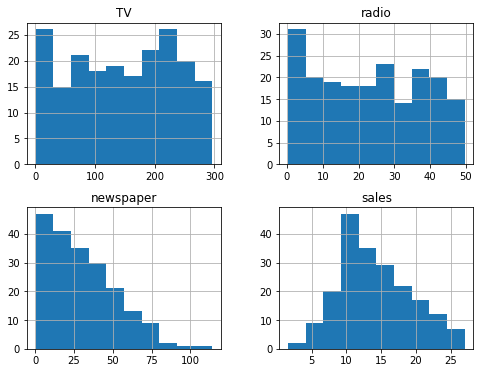

In [12]:
# we wll check the distribution of the data points
adv_df.hist(figsize =(8,6));

Observation Newspapaer and radio are right skewed data however TV is the left skewed distribution

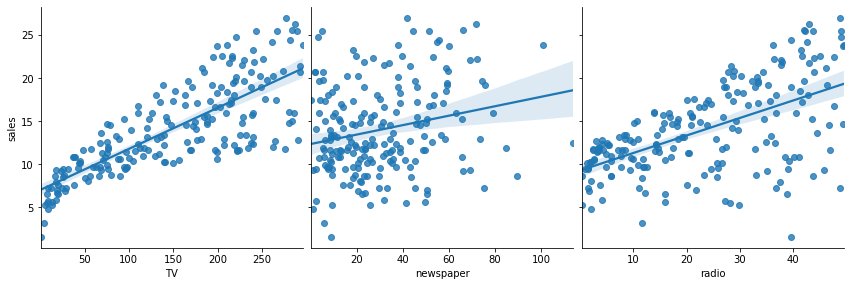

In [13]:
# Let's see how Sales are related with other variables using regplot to understand relationship between features and result
sns.pairplot(adv_df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='reg')
plt.show()

we see positive correlation of TV and radio with sales however newspaper is more scattered.

## Checking the Correlation

In [14]:
adv_df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.048973,0.056648,0.782224
radio,0.048973,1.000000,0.348539,0.571885
newspaper,0.056648,0.348539,1.000000,0.228299
sales,0.782224,0.571885,0.228299,1.000000


OBSERVATIONS:
    
    1.All the features are positively correlated with the target variable.
    
    2.TV is highly correlated with Sales. So most of the advertising sales comes from Tv.Also radio is also having a good bond with SAles. 
    
    3.Newspaper is least correlated with Sales.

<AxesSubplot:>

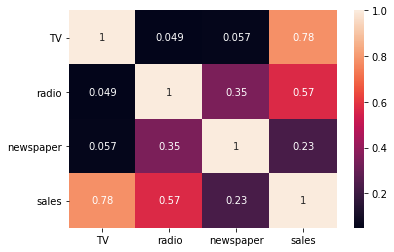

In [15]:
# checking with heatmap
sns.heatmap(adv_df.corr(),annot=True)

as seen in the pair plot, TV and radio have higher correlation with target variable.

### Check for Skewness

In [16]:
x=adv_df.drop('sales', axis=1)
y=adv_df['sales']
x

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [17]:
# Cheking Skewness
x.skew().sort_values(ascending=False)

newspaper    0.894720
radio        0.091924
TV          -0.069853
dtype: float64

Since newspaper is little skewed. so we will apply skewness transformation on newspaper column. 

In [18]:
#Applying log transformation gives -ve value i.e.(-1.1812). So applying sqrt transformation is more suitable
#Applying square root transformation on newspaper column
#newspaper=np.sqrt(adv_df['newspaper'])
#newspaper.skew()
adv_df["newspaper"] =  adv_df["newspaper"].map(lambda x: np.sqrt(x))   
adv_df.iloc[:,:-1].skew()

TV          -0.069853
radio        0.091924
newspaper    0.062388
dtype: float64

## Checking For Outliers

TV              AxesSubplot(0.125,0.536818;0.133621x0.343182)
radio        AxesSubplot(0.285345,0.536818;0.133621x0.343182)
newspaper     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
sales        AxesSubplot(0.606034,0.536818;0.133621x0.343182)
dtype: object

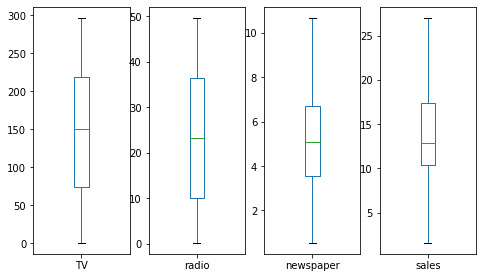

In [19]:
adv_df.plot(kind='box',subplots=True,layout=(2,5),figsize=(10,10))

Since ther is no outliers, So we will not remove outliers

## Data Modeling

In [20]:
# sepratating data into train and test

X = adv_df[["TV","radio","newspaper"]]
Y = adv_df["sales"]

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,TV,radio,newspaper
0,0.969852,0.979749,1.563095
1,-1.197376,1.081669,0.774855
2,-1.516155,1.530113,1.566049
3,0.052050,1.217561,1.233576
4,0.394182,-0.854796,1.230360
...,...,...,...
195,-1.270941,-1.337214,-0.700730
196,-0.617035,-1.255679,-1.127935
197,0.349810,-0.956716,-1.283433
198,1.594565,1.265123,1.473445


### Creating the training and testing data sets

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, random_state=42)

## Machine Learning Model for Regression

In [23]:
# Regression Model Function
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, random_state=42)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    print(f"training_score {model.score(X_train,Y_train)}")
    print(f"test_score {model.score(X_test,Y_test)}")
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [24]:
# Linear Regression Model
model=LinearRegression()
reg(model, X, Y)

training_score 0.8958313417760103
test_score 0.8986246063592553
RMSE Score is: 1.7286666692413446
R2 Score is: 89.86246063592553
Cross Validation Score: 88.6352808858259
R2 Score - Cross Validation Score is 1.2271797500996229


In [25]:
# Support Vector Regression
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

training_score 0.797495275745076
test_score 0.8735157401371962
RMSE Score is: 1.930915298545149
R2 Score is: 87.35157401371961
Cross Validation Score: 77.73103057393334
R2 Score - Cross Validation Score is 9.620543439786275


In [26]:
# Random Forest Regressor
model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

training_score 0.6970711611099264
test_score 0.6588914447763619
RMSE Score is: 3.1709638249727155
R2 Score is: 65.88914447763618
Cross Validation Score: 61.520155366450155
R2 Score - Cross Validation Score is 4.368989111186025


In [27]:
# K Neighbors Regressor
KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

training_score 0.7001298132396953
test_score 0.6522804674530677
RMSE Score is: 3.2015443704569373
R2 Score is: 65.22804674530677
Cross Validation Score: 62.455644994619874
R2 Score - Cross Validation Score is 2.772401750686896


In [28]:
# Ada Boost Regressor
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

training_score 0.976356640185833
test_score 0.964270411935429
RMSE Score is: 1.0262637434843327
R2 Score is: 96.42704119354289
Cross Validation Score: 95.67476536018953
R2 Score - Cross Validation Score is 0.7522758333533659


#### Selecting Best Model

Since the lower is the result(diff between r2 score and cv score), the better is the model considered.AdaBoostRegressor has lowest result value and training and test scores are also good.  So it is performing is better than other algorithm thus we can select AdaBoostRegressor model for further process. training score and test score dont have diference thus we can say that model is not overfit.

using the cross valiation wit 5 CV and checking that how 5 CV (models) gives average accuracy. Accuracy seems good with small standard deviation

## Hyper Parameter Tuning

In [29]:
# Choosing Ada Boost Regressor
fmod_param = {'n_estimators' : [50, 100, 150, 200],
              'learning_rate' : [0.001, 0.01, 0.1, 1],
              'loss' : ["linear", "square", "exponential"],
              'random_state' : [21, 42, 104, 111]
             }

In [30]:
GSCV = GridSearchCV(AdaBoostRegressor(), fmod_param, cv=5)

In [31]:
GSCV.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [21, 42, 104, 111]})

In [32]:
GSCV.best_params_

{'learning_rate': 1,
 'loss': 'square',
 'n_estimators': 150,
 'random_state': 111}

In [33]:
Final_Model = AdaBoostRegressor(learning_rate=1, loss="linear", n_estimators=150, random_state=111)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 96.63027431849936


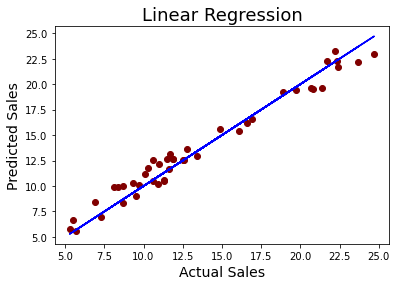

In [35]:
plt.scatter(Y_test, fmod_pred, color = 'maroon')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

We can see that the prediction is way better than the previous one as the scattering is less. The R-square value is more than before that shows a better fit to tha data.

## Modeling Saving

In [39]:
import pickle
filename='Predicted_Sales.pkl'
pickle.dump(Final_Model,open(filename,'wb'))